Zomato Data Analysis Project

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn  as sns


In [2]:
df =  pd.read_csv("Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
# data cleaning for column rating
def handleRate(value):
    value = str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handleRate)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


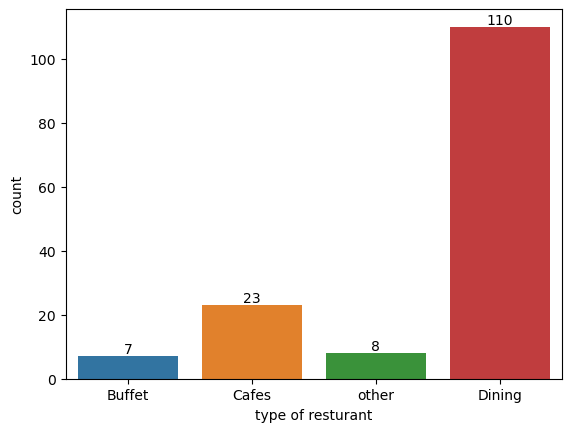

In [12]:
# type of Resturant
ax =sns.countplot(x=df['listed_in(type)'])
ax.bar_label(ax.containers[0])
plt.xlabel("type of resturant")
plt.show()


here the countplot conclude that dining tpye of resturant have maximum number of customers followed by cafes then other and at last buffet

Text(0, 0.5, 'Votes')

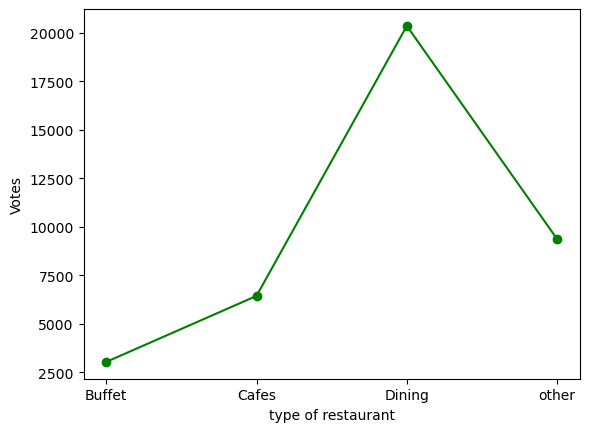

In [22]:
# count the number votes per type of resturant

grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("type of restaurant") 
plt.ylabel("Votes")



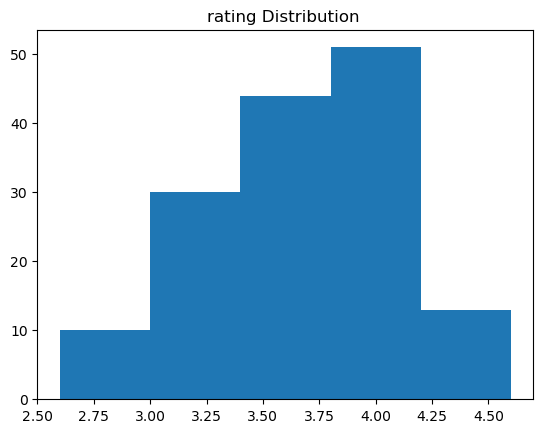

In [24]:
plt.hist(df["rate"],bins=5)
plt.title("rating Distribution ")
plt.show()

Average order spend by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

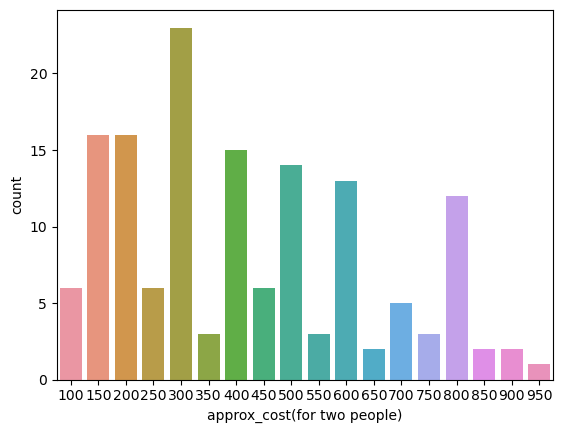

In [29]:
couple = df['approx_cost(for two people)']
sns.countplot(x=couple )

rs 300 is prefered for majority of couples

which mode receives maximaum rating

<Axes: xlabel='online_order', ylabel='rate'>

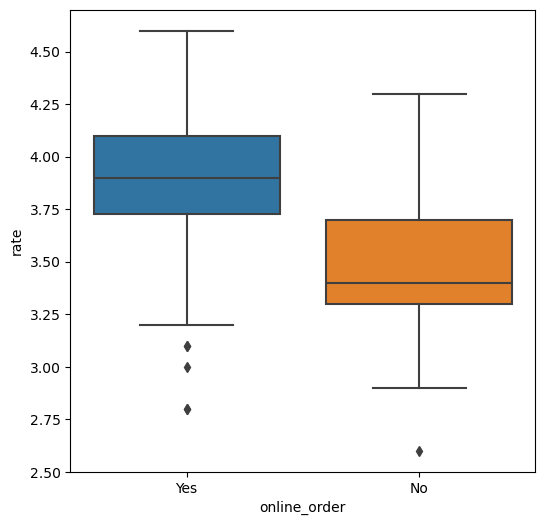

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order' , y='rate' , data = df)


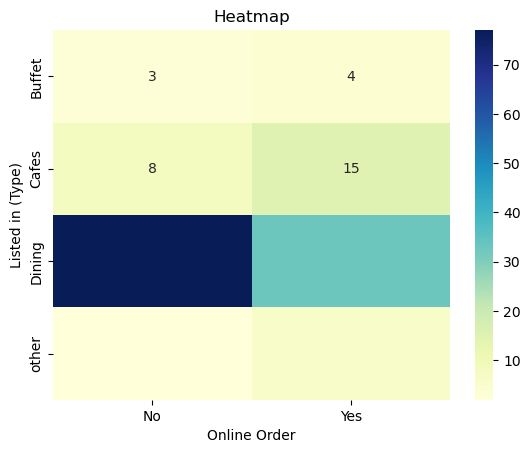

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


In [37]:
pivot_table = df.pivot_table(index='listed_in(type)' , columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu" , fmt='d')
plt.title("Heatmap")
plt.xlabel('Online Order')
plt.ylabel('Listed in (Type)')
plt.show()
print(pivot_table)

Conclusion : dining  resturant primarily accept offline orders .whereas cafes primarily receive online orders.This suggests that clients prefers orders in person at restaurants , but prefer online ordering at cafes